<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Transient flow
*Developed by Mark Bakker*

In [1]:
from pylab import *
%matplotlib inline


### Governing Equations

In reality, the head is not only a function of space, but also a function of time. When the head increases, more water is stored in the aquifer, and when the head decreases, less water is stored in the aquifer. For steady flow, continuity of flow states that the divergence of the discharge vector  is equal to the areal recharge rate $N$.

$$
\nabla\cdot\vec{Q}=N
$$

When groundwater flow is transient, the divergence of the discharge vector is equal to the areal recharge plus the decrease in storage of water in the aquifer. The physics of the storage process is different for unconfined aquifers than for confined aquifers, but with suitable approximations, both lead to the same governing differential equation. The derivation of the governing equation for transient flow from the general statement of conservation of mass includes many approximations which are not discussed here. Rigorous derivations stating all necessary approximations are provided by, e.g., Verruijt (1969) and Brutsaert (2005).


First, consider a column of an unconfined aquifer with constant surface area $A$. When the head in the column is increased by an amount d$h$ (i.e., the phreatic surface is raised d$h$), the volume of water in the column increases by an amount

$$
\text{d}V = S \text{d}h A
$$

were $S$ [-] is the storativity of the unconfined aquifer. When the aquifer material above the phreatic surface is dry, the storativity of the unconfined aquifer is equal to the porosity. In practice, the storativity is always smaller than the porosity, as there is water present in the pores above the phreatic surface. The storativity of an unconfined aquifer is also called the specific yield.

Next, consider a column of a confined aquifer with constant surface area $A$. When the head is now increased by d$h$, the volume of water still increases by an amount d$V$ according to the equation above, but the storage coefficient is much smaller. Additional water can only be stored in the column through compression of the water and expansion of the aquifer. For most unconsolidated aquifers, the ability of the aquifer to expand is significantly larger than the ability of the water to compress, so that the compression of the water may be neglected. The storage coefficient of a confined aquifer is a function of the aquifer thickness: an aquifer of the same material but twice the thickness has a storage coefficient that is twice as large. The storage coefficient of a confined aquifer may be written as

$$
S = S_s H
$$

where $S_s$ [L$^{-1}$] is the specific storage of the aquifer, the storage per meter aquifer thickness. Typical values for the specific storage of sand are between $S_s=10^{-3}$ m$^{-1}$ and $S_s=10^{-5}$ m$^{-1}$.

Inclusion of the storage term in the divergence of the discharge vector gives

$$
\nabla\cdot\vec{Q}=-S\frac{\partial h}{\partial t} + N
$$

where the areal recharge $N$ may now vary with time.
Using the potential for confined flow, this equation may be converted to

$$
\nabla^2\Phi = \frac{1}{D} \frac{\partial \Phi}{\partial t} - N
$$

where the aquifer diffusivity $D$ is defined as

$$
D = T / S
$$

and $T$ is the transmissivity.
The governing differential equation reduces to the diffusion equation when the areal recharge equals zero,

$$
\nabla^2\Phi = \frac{1}{D} \frac{\partial \Phi}{\partial t}
$$

The diffusion equation governs the transient behavior of many other physical processes. 

Using the potential for unconfined flow, the continuity equation may be written as

$$
\nabla^2\Phi = \frac{S}{kh} \frac{\partial \Phi}{\partial t} - N
$$

This non-linear differential equation for transient unconfined flow is called the Boussinesq equation (Boussinesq, 1904). A common way to linearize the equation is to replace the head $h$ in front of the time-derivative on the right-hand side by an average head $\overline{h}$ (e.g, Strack, 2017), so that the diffusivity of an unconfined aquifer becomes $D=S/(k\overline{h})$. Note that after linearization, unconfined flow is also described by the diffusion equation (in absence of areal infiltration). Another way to linearize the differential equation for transient unconfined flow is to use the differential equation for transient confined flow, to approximate the transmissivity by $T\approx k\overline{h}$, and to use the storage coefficient for unconfined flow. This latter approach is used in this Notebook.

Exact solutions for transient groundwater flow are, not surprisingly, more difficult to obtain than those for steady flow. Common mathematical approaches include separation of variables, Fourier series, and Laplace or other transforms (e.g., Bruggeman, 1999). The solution of combined transient confined and transient unconfined flow is not as easy as for steady flow, because the storage coefficients differ between confined and unconfined flow. In this Notebook, solutions are presented, without derivation, for one-dimensional flow. These solutions are valid for both confined and for unconfined flow as long as the linearization of the differential equation for unconfined flow is reasonable.

### One-dimensional periodic flow
Consider one-dimensional transient flow where the boundary condition varies periodically through time.
The aquifer is semi-infinite and is bounded by open water at $x=0$; there is no areal infiltration and no flow at infinity. The water table at the boundary varies sinusoidally

$$
h(0,t) = h_0 + A\cos(2\pi t/\tau)
$$

where $A$ is the amplitude of the fluctuation and $\tau$ is the time period of the fluctuation. The sinusoidal fluctuation in the surface water may be caused, for example, by tides, by the periodic operation of hydroelectric dams, or by seasonal fluctuations of the surface water level.
Solutions to problems of periodic flow may be obtained by separtation of variables. The solution to this problem is

$$
\Phi = Th_0 + AT\Re\exp(-x\sqrt{i}/\lambda+2\pi i t/\tau)
$$

where $\Re$ stands for taking the real part of the complex function, $i$ is the imaginary unit, and $\lambda$ is a characteristic length defined as

$$
\lambda = \sqrt{\tau D/2\pi}
$$

The amplitude $A$ dampens away from the open water as $\exp[-x/(\lambda\sqrt{2})]$, and is shown in the figure below. At a distance of $3\lambda$, the amplitude has damped to less than 5% of the amplitude at $x=0$, and at a distance of $6\lambda$, the amplitude has damped to less than 0.25% of the amplitude at $x=0$. This result may be used as a rule of thumb to assess whether fluctuations in surface water levels need to be taken into account when considering the head and flow in an aquifer. If the area of interest is farther away from a surface water body than $6\lambda$, periodic fluctuations of the surface water level with a period of $\tau$ may be neglected. Note that $\lambda$ is a function of the period $\tau$: the longer the period $\tau$, the larger the characteristic length $\lambda$.
Fluctuations with different periods and amplitudes may be superimposed in time. An arbitrary fluctuation of the water level may be approximated by a Fourier series. The damping as a function of the distance is shown in the figure below.

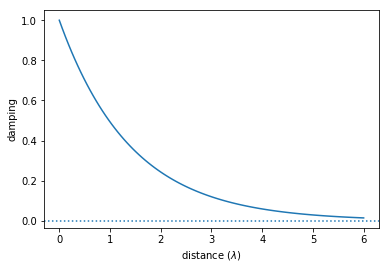

In [2]:
k = 10
H = 10 
Ss = 1e-4
tau = 365
D = k * H / (Ss * H)
lab = sqrt(tau * D / (2 * pi))
x = linspace(0, 6 * lab, 100)
damping = exp(-x / (lab * sqrt(2)))
plot(x, damping)
axhline(0, ls=':')
xticks(arange(0, 7 * lab, lab), arange(0, 7))
ylabel('damping')
xlabel('distance ($\lambda$)');

A similar analysis may be carried out for a well with an average discharge of $Q_0$ and a sinusoidal discharge with an amplitude of $Q_0$

$$
Q(t) = Q_0 + Q_0\cos(2\pi t/\tau)
$$

At a certain distance from the well, the sinusoidal fluctuation of the discharge is unnoticeable and it seems that the well pumps with a steady discharge $Q_0$. This distance depends again on the characteristic length $\lambda=\sqrt{\tau D/2\pi}$. The radial component of the discharge vector for a well with a constant discharge $Q_0$ is given by 

$$
Q_r = -\frac{Q}{2\pi}\frac{1}{r}
$$

The relative difference between the radial flow
caused by the well with a sinusoidal discharge and the flow caused by a well with constant discharge $Q_0$ is 4.6\% at a distance of $6\lambda$, reducing to 0.3\% at $10\lambda$. Hence, a well with a periodic discharge varying between 0 and $2Q_0$ may be represented by a well with steady discharge $Q_0$ beyond a distance of $10\lambda$ from the well.

### Transient wells

The solution for steady flow to a well with discharge $Q$ is the Thiem solution

$$
\Phi=\frac{Q}{2\pi}\ln{(r/R)} + \Phi_0
$$

where $\Phi(r=R)=\Phi_0$.
In this section, the transient equivalent is discussed. At time $t=t_0$ the heads in the aquifer are constant and equal to $h_0$ everywhere and a well starts pumping with discharge $Q$. The head $h_0$, and thus the corresponding potential $\Phi_0$, at infinity remains constant throughout time

$$
\Phi(\infty,t) = \Phi_0
$$

This problem may be solved as a similarity solution or by Laplace transforms.  The potential as a function of time and the radial distance from the well is known as the Theis solution (Theis, 1935) and is 

$$
\Phi = \Phi_0 - \frac{Q}{4\pi}\text{E}_1\left( \frac{S r^2}{4T(t-t_0)} \right) \qquad t\ge t_0
$$

where E$_1$ is the exponential integral defined as

$$
\text{E}_1(u) = \int_u^{\infty} \frac{\exp(-s)}{s}d s 
$$

The head is a function of only one dimensionless parameter, $u$

$$
u =  \frac{S r^2}{4T(t-t_0)}
$$

Hence, if a certain drawdown $h_0-h(r_1,t_1)$ is reached at a distance $r_1$ at time $t_1$, the same drawdown is reached at a distance $2r_1$ at time $4t_1$.  A common approximation for E$_1$ is the series

$$
\text{E}_1(u) = -\gamma -\ln u - \sum_{n=1}^\infty \frac{ (-u)^n}{n(n!)}
$$

where $\gamma=0.5772...$ is Euler's constant. The infinite series for E$_1$ give above converges quickly (when $u<1$), so that in practice only a small number of terms needs to be used. In Python, E$_1$ is available as `exp1` from the `scipy.special` package. 

One might expect that if the well is pumped for a long-enough period of time, the head will approach steady-state. This is not the case: the Theis solution does not approach the Thiem solution for large time. For the Thiem solution, the head approaches infinity when $r$ approaches infinity, because the source of water for the Thiem solution lies at infinity. The Theis solution approaches the intitial head $h_0$ when $r$ approaches infinity and all the pumped water comes from storage. In reality, there is always a water source closer than infinity, and if that source is included in the solution, the transient solution will approach a steady solution for large time. For example, consider a well at $(-x_1,y_1)$ near a large and straight river with a constant potential $\Phi_0$ along $y=0$. The steady solution may be obtained with the method of images and was done in a previous Notebook. A transient solution may also be obtained with the method of images as

$$
\Phi = -\frac{Q}{4\pi}\left[ \text{E}_1\left( \frac{S r_1^2}{4T(t-t_0)} \right) - \text{E}_1\left( \frac{S r_2^2}{4T(t-t_0)} \right)\right] + \Phi_0
$$

where $r_1^2=(x-x_1)^2+(y-y_1)^2$ and $r_2^2=(x-x_2)^2+(y-y_2)^2$.
When time approaches infinity, $u$ approaches zero, and E$_1$ may be represented with the first two terms of the infinite series for E$_1$ given above. Substitution of these terms for E$_1$ leads to the steady solution

$$
\Phi=\frac{Q}{2\pi}\ln\frac{r_1}{r_2} + \Phi_0
$$

Even though the head of the Theis solution by itself does not approach the steady state head of the Thiem solution, the discharge vector does approach the steady solution. The radial component of the discharge vector $Q_r$ of the Theis solution may be obtained through differentiation of the potential to give

$$
Q_r = -\frac{Q}{2\pi} \frac{1}{r}\exp(-u)
$$

It is seen from this equation that when time approaches infinity, and $u$ approaches zero, $Q_r$ approaches the steady discharge vector

$$
Q_r = -\frac{Q}{2\pi}\frac{1}{r}
$$

The consequence is that head gradients in the Theis solution approach the steady head gradients obtained with the Thiem solution, even though the head values themselves do not.

The Theis solution is very useful to determine aquifer parameters from a pumping test. During a pumping test, a well is turned on and the drawdown is measured in a nearby observation well. The Theis solution may be fit to observed head data to determine the transmissivity  $T$ and the storage coefficient $S$  in the neighborhood of the well.

Transient solutions may be superimposed in time as well as in space. For example, consider a well with a discharge $Q$ operating from $t=t_0$ to $t=t_1$ and with zero discharge after $t_1$.
For the period $t>t_1$, the potential may be represented by two Theis wells, one with a discharge $Q$ starting at $t=t_0$ and one with a discharge $-Q$ starting at $t=t_1$

$$
\Phi = -\frac{Q}{4\pi}\left[ \text{E}_1\left( \frac{S r^2}{4T(t-t_0)} \right) - \text{E}_1\left( \frac{S r^2}{4T(t-t_1)} \right)\right] \qquad t \ge t_1
$$

This is called a pulse solution, where the pulse lasts from $t_0$ until $t_1$.

### Pumping test

Kruseman and de Ridder (1990) describe a pumping test at the *Oude Korendijk* in The Netherlands in their famous book on pumping tests. The data from an observation well located 30 m from the pumping well is given in the file `oudekorendijk_h30.txt`. The first column contains the time (in minutes) and the second column the drawdown (in meters). The discharge of the well during the pumping test was approximately 788 m$^3$/day. The thickness of the aquifer is 7 m. The question is to determine the hydraulic conductivity and the specific storage coefficient of the aquifer. First, we import the data and plot it. Time is converted to tdays. As the measurement frequency is much larger at early time, a log scale is used for the time axis. 

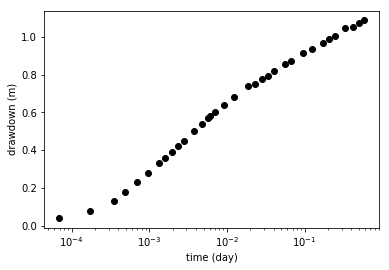

In [5]:
data = loadtxt('oudekorendijk_h30.dat')
to = data[:, 0] / 24 / 60 
do = data[:, 1]
semilogx(to, do, 'ko')
xlabel('time (day)')
ylabel('drawdown (m)');

A function is written for the drawdown at the observation well (note that the drawdown is positive when the head goes down). The function takes as input arguments the time (which may be an array), the transmissivity of the aquifer, and the storage coefficient of the aquifer.

In [7]:
from scipy.special import exp1
def drawdown(t, T, S):
    Q = 788
    r = 30
    u = r ** 2 * S / (4 * T * t)
    d = Q / (4 * pi * T) * exp1(u)
    return d

The optimal values of the transmissivity and storage coefficient are determined with the `curve_fit` function of `scipy.optimize`. The `curve_fit` funtion takes as input arguments the function to be fitted, the values of the independent variable (in this case time) and the measured values of the dependent variable (in this case drawdown). In addition, reasonable starting values (as an array) are specified for the two parameters by specifying the keyword `p0`. The `curve_fit` function returns an array of the optimal values and a covariance matrix; the covariance matrix is not used in this Notebook. The optimal values for $k$ and $S_s$ are computed from $T$ and $S$ through division by the thickness of the aquifer (7 m).

In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(drawdown, to, do, p0=[100, 1e-4])
print('optimal values of T (m2/d) and S:', popt)
print('optimal values of k (m/d) and Ss (1/m):', popt / 7)

optimal values of T (m2/d) and S: [  4.80469475e+02   1.12506903e-04]
optimal values of k (m/d) and Ss (1/m): [  6.86384964e+01   1.60724148e-05]


Finally, the fitted function is plotted on the same graph as the measured data to assess the fit. Do you think it is a good fit?

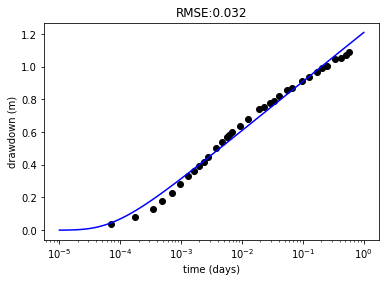

In [9]:
t = logspace(-5, 0, 100)
d = drawdown(t, T=popt[0], S=popt[1])
semilogx(to, do, 'ko')
semilogx(t, d, 'b')
xlabel('time (days)')
ylabel('drawdown (m)')
dm = drawdown(to, T=popt[0], S=popt[1])
RMSE = sqrt(sum((dm - do)**2) / len(do))
title('RMSE:' + str(round(RMSE, 3)));

#### Exercise 1
A 1.0 m diameter well has just been installed in a confined aquifer. Previous testing indicates that the average $T$ and $S$ in the aquifer are 73 m$^2$/day and $0.00025$, respectively. The well is to be tested by pumping at 150 m$^3$/day for 10 sec and then shut off. Predict the drawdown in this well at the following times since the start of pumping: 0.1, 1, 10, 10.1, 11, and 20 sec.

In [11]:
from scipy.special import exp1
def drawdown1(t):
    T = 73
    S = 0.00025
    r = 0.5
    Q = 150
    t0 = 0
    t1 = 10/86400
    if t < t1:
        u = r**2*S/4/T/(t-t0)
        d = Q/4/pi/T*exp1(u)
    else:
        u1 = r**2*S/4/T/(t-t0)
        d1 = Q/4/pi/T*exp1(u1)
        u2 = r**2*S/4/T/(t-t1)
        d = d1 - Q/4/pi/T*exp1(u2)
    return d
# from time 0 to 10 
time = np.array([0.1, 1, 10, 10.1, 11, 20])/86400
for t in time:
    d = drawdown1(t)
    print("drawdown at ",t*86400, "s is equal to", d)

drawdown at  0.1 s is equal to 0.210489260767
drawdown at  1.0 s is equal to 0.561110647625
drawdown at  10.0 s is equal to 0.934910921523
drawdown at  10.1 s is equal to 0.726045701391
drawdown at  11.0 s is equal to 0.389357485666
drawdown at  20.0 s is equal to 0.113189114658


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [7]:
np.array([0.1, 1, 10, 10.1, 11, 20])[2]

10.0

#### Exercise 2
Consider a well with discharge $Q = 100$ m$^3$/day, which is located at $(x_w,y_w) = (−100,0)$ m. The well is installed in a confined aquifer with transmissivity $T = 100$ m$^3$/d and storage coefficient $S = 0.001$. 
Questions:  
a) Compute the drawdown caused by the well at $(x, y) = (−50, 0)$ after 1 day of pumping.  
b) Compute the drawdown caused by the well at $(x, y) = (−50, 0)$ after 1 day of pumping if there is a river with a fixed water level along $x = 0$.  
c) Compute the drawdown caused by the well at $(x, y) = (−50, 0)$ after 1 day of pumping if there is an impermeable rock outcrop along $x = 0$.  

In [23]:
def drawdown(t, r, t0, T, S, Q):
    u = r ** 2 * S / (4 * T * (t-t0))
    d = Q / (4 * pi * T) * exp1(u) 
    return d
Q = 100
T = 100
S = 0.001
xw1, yw1 = -100,0
xw2, yw2 = 100,0
x, y = -50,0
r1 = sqrt((x - xw1)**2 + (y - yw1)**2)
dd1 = drawdown(1,r1, 0,T,S,Q)
r2 = sqrt((x- xw2)**2+(y-yw2))
dd2 = drawdown(1, r1 ,0 ,T,S,Q) - drawdown(1,r2,0,T,S,Q)
dd3 = drawdown(1,r1,0,T,S,Q) + drawdown(1,r2,0,T,S,Q)
print("drawdown at (-50,0) is %s meters in normal condition"%(round(dd1,2)))
print("drawdown at (-50,0) is %s meters with a river at x = 0"%(round(dd2,2)))
print("drawdown at (-50,0) is %s meters with an impermeable rock outcrop at x = 0"%(round(dd3,2)))

drawdown at (-50,0) is 0.36 meters in normal condition
drawdown at (-50,0) is 0.17 meters with a river at x = 0
drawdown at (-50,0) is 0.55 meters with an impermeable rock outcrop at x = 0


#### Exercise 3
Consider a well with discharge $Q = 314$ m$^3$/d which is screened in a confined aquifer with transmissivity $T = 500$ m$^2$/d and storage coefficient $S = 0.001$. 
Given: E$_1(u = 0.0038) = 5$.  
Questions:  
a) At what distance is the drawdown $0.25$ m after 1 day of pumping. And after 2 days of pumping?   
b) At what time is the drawdown $0.25$ m at a distance 50 m from the well? And at 100 m from the well?  

In [25]:
0.25/314*4*pi*500
sqrt(0.0038*4*500/0.001)

87.177978870813462

In [37]:
Q = 314
T = 500
S = 0.001
E = 5
t=1
r = 100
def dis(x, S=S, T=T, t=t):
    u = x**2 * S/4/T/t
    return u-0.0038
drawdown = 0.25
from scipy.optimize import newton
#newton(dis, 5)
from scipy.optimize import bisect
def time(t, S=S, T=T, x=r):
    u = x**2 * S/4/T/t
    return u-0.0038
#bisect(time, 0.1,10)
newton(time,0.5)


1.3157894736842104

#### Exercise 4
Consider a pumping test with discharge $Q = 1.3$ m$^3$/min in a highly transmissive confined aquifer; data is given in the table. Drawdown is measured in an observation well at $r = 95$ m from the well. The measured drawdown is given below.  
Questions:  
a) Estimate the transmissivity and storage coefficient.  
b) Plot the observed drawdown vs. time and the simulated drawdown vs. time on the same graph.

| time (min)       | drawdown (m) | 
| :-------------: |:-------------:|
|  1    | 0.15   | 
|  2    | 0.22   | 
|  4    | 0.3   | 
|  8    | 0.39   | 
|  15    | 0.46   | 
|  30    | 0.55   |
|  60    | 0.63   |
|  120    |0.72    |
|  240    |0.81   |

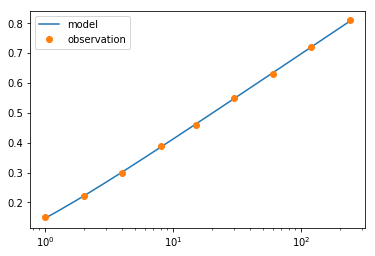

In [27]:
from scipy.optimize import curve_fit
Q = 1.3
r = 95 
time = [1,2,4,8,15,30,60,120,240]
drawdown_data = [0.15, 0.22,0.3,0.39,0.46,0.55,0.63,0.72,0.81]
def drawdown(t, T, S, Q=Q, r=r):
    u = r ** 2 * S / (4 * T * t)
    d = Q / (4 * pi * T) * exp1(u)
    return d
popt, pcov = curve_fit(drawdown, time, drawdown_data, p0=[1, 1e-4])

t=linspace(1,240,1000)

dd = drawdown(t,popt[0], popt[1],Q ,r )
semilogx(t, dd,label="model")
semilogx(time, drawdown_data,'o',label = "observation")
legend()

#### Exercise 5
Consider a well in a thin, confined aquifer. The well is located near a long straight river which is in full contact with the aquifer. Drawdown data is measured in the well and given in the table below. The river is roughly straight, and about 35 m from the well. The discharge of the well is 55 m$^3$/day. The diameter of the well is 80 cm.  
Questions:  
a) Estimate the transmissivity and storage coefficient of the aquifer while neglecting the river.  
b) Estimate the transmissivity and storage coefficient of the aquifer while taking into account the presence of the river.  
c) Plot the observed drawdown vs. time and the simulated drawdown vs. time with and without the river on the same graph.

|time (day) |drawdown (m)| 
| :-------------: |:-------------:|
|0.00069| 1.06 |
|0.00174| 2.42|
|0.0033 |3.29 |
|0.00564| 3.82 |
|0.00915| 4.15 |
|0.01442| 4.37 |
|0.02233| 4.50 |
|0.03418| 4.59 |
|0.05197| 4.65 |
|0.07865| 4.69 |
|0.11867| 4.72|
|0.1787 |     4.73|
|0.26874|     4.75|
|0.40381|     4.75|
|0.60641|     4.76|
|0.91031|     4.76|
|1.0    |     4.76|

### References
Boussinesq J (1904) Recherches thoretique sur l’coulement des nappes d’eau infiltres dans le sol et sur le dbit des sources. J. Math. Pure Appl. 10: 363-394.  
Bruggeman GA (1999) Analytical solutions of geohydrological problems. Developments in water science, 46. Elsevier.  
Brutsaert, W (2005) Hydrology - An Introduction. Cambridge Univ. Press, New York.  
Kruseman, GP, NA de Ridder (1990) Analysis and evaluation of pumping test data. ILRI Publication 1990 No.47.  
Strack ODL (2017) Analytical Groundwater Mechanics. Cambridge University Press, Cambridge, UK.  
Theis CV (1935) The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using ground-water storage. Trans Amer Geophys Union 16: 519-524.  
Verruijt, A (1969) Elastic storage of aquifers. In: ”Flow through porous media”. Ed. R.J.M. de Wiest, New York: Academic press: 331-376.